In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X, y = make_classification()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

In [3]:
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)


In [4]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.7802197802197803 0.8736263736263736


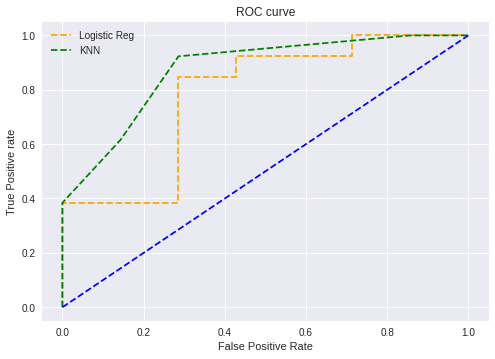

Log reg:  [1.99858852 0.99858852 0.96726536 0.93590868 0.58352284 0.40885782
 0.13056295 0.01315454 0.01283418 0.00848805]
KNN:  [2.   1.   0.75 0.5  0.25 0.  ]


In [8]:
# matplotlib


plt.style.use("seaborn")

# plot roc curves
plt.plot(fpr1, tpr1, linestyle="--", color="orange", label="Logistic Reg")
plt.plot(fpr2, tpr2, linestyle="--", color="green", label="KNN")
plt.plot(p_fpr, p_tpr, linestyle="--", color="blue")
# title
plt.title("ROC curve")
# x label
plt.xlabel("False Positive Rate")
# y label
plt.ylabel("True Positive rate")

plt.legend(loc="best")
plt.savefig("ROC", dpi=300)
plt.show()
print("Log reg: ", thresh1)
print("KNN: ", thresh2)